## An Analysis On Chronic Diseases And Social Determinants of Health

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Exploratory Data Analysis](#exploratory)
- [Part III - Correlation Analysis](#correlation)
- [Part IV - Conclusion And Recommendations](#conclusion)
- [Part V - References](#references)

<a id='intro'></a>
### Introduction

The Behavioral Risk Factor Surveillance System (BRFSS) dataset was created by the CDC and is a continuous health survey conducted in the United States of America to monitor and understand health-related behaviors, risks, and understanding the use of health services of the US population. The data gathered from the BRFSS is used by public health professionals, researchers, and policy-makers in order to construct and implement health initiatives and policies. In my capstone project and analysis, I will be performing an in-depth analysis on the 2022 BRFSS dataset to explore the possible relationship between income levels and specific chronic health conditions such as diabetes, hypertension, and asthma. In this analysis, I will be utilizing several data analysis methods to find relationships between these key variables. 

Dataset:

The BRFSS 2022 dataset contains responses from 50 states in the USA, District of Columbia and all US territories and were collected using telephone calls with people who were not hospitalized and were greater than or equal to 18 years of age. The dataset contains very important information related to health behaviors, health status, and demographic information. The data has already been pre-processed through several data management and transformation techniques such as weighing and calculating variables. 

For my analysis, I have chosen to use a subset of variables for analysis that are more relevant to my research question. Is there a correlation between patients who have a lower income level and being more predisposed to chronic conditions such as asthma, diabetes, and hypertension (heart attacks), and how can healthcare providers tailor to patients who have lower income levels based on the predisposition of these health conditions? The variables I have selected are:

INCOME3 - Annual household income from all sources
DIABETE4 - Respondent was told at least once in the past they had diabetes  (If ´Yes´ and respondent is female, responded was asked ´ Was this only when you were pregnant?´. If the Respondent says pre-diabetes or borderline diabetes, the response code is 4
ASTHMA3 - Respondent was told at least once in the past they had Asthma
CVDSTRK3 - Respondent was told at least once in the past they had a stroke
BIRTHSEX - Respondent's sex at birth
_AGEG5YR - Fourteen-level age category
_EDUCAG - Level of education completed
_HLTHPLN - Adults who had some form of health insurance
PERSDOC3 - Respondent was asked if they had a person or group of doctors they think of as their personal healthcare provider

### Methodology

Data Preparation:

Since my dataset has already been preprocessed, I am going to inspect my dataset using Python, handle missing values, and ensure data integrity using Python and Jupyter Notebook. I will check for duplicate values and impute my NaN values with Mode. I will also filter the dataset to include only the relevant variables for the analysis.

Descriptive Statistics:

To understand the distribution of key variables, I will generate summary statistics and visualizations to drive any insights into the patterns of said variables. 

Exploratory Data Analysis:

I will hone in on the patterns and trends of this dataset and explore the relationships between variables using EDA. 

Correlation Analysis:

Using correlation analysis, I will calculate correlation coefficients for pairs of variables and test the statistical significance of the correlations.


Expected Outcomes

By the end of this analysis, I will provide a clearer understanding of the key factors associated with income levels and propensity to chronic diseases in the US population. The insights gained from my analysis will contribute to transparency regarding inequality in healthcare and drive efforts to improve public health strategies and initiatives. Additionally, the methodology and findings of this project can serve as a valuable reference for future research in the field of health behavior analysis.


Now, let's import our libraries in the cell below!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

In [4]:
# data loading and conversion to CSV file
file_path = r'C:\Users\lopez\Downloads\LLCP2022XPT\LLCP2022.XPT'     

In [5]:
# reading my data 
df, meta = pyreadstat.read_xport(file_path, encoding='latin1')

In [6]:
# converting my SAS file to CSV
df.to_csv('brfss_transformed.csv', index=False)

In [7]:
# viewing first rows for confirmation
print(df.head())  

   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  02032022     02   03  2022    1100.0  2022000001   
1     1.0     1.0  02042022     02   04  2022    1100.0  2022000002   
2     1.0     1.0  02022022     02   02  2022    1100.0  2022000003   
3     1.0     1.0  02032022     02   03  2022    1100.0  2022000004   
4     1.0     1.0  02022022     02   02  2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6  DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0       0.0   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0       0.0   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0      10.0   

   _RFBING6  _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0       0.0       1.0       1.0       2.0       2.0  
1     

Overall, my dataset looks fairly standardized except for the null values. All of the data is comprised of categorical, or numerical data. We have lots of data relating to demographics and behavioral health. 

In [8]:
# checking count of rows and columns of my original dataset
print(df.shape)
print(df.info())

(445132, 328)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 328 entries, _STATE to _AIDTST4
dtypes: float64(323), object(5)
memory usage: 1.1+ GB
None


In [9]:
# filtering down only the columns I want to keep for all of my analyses. 
relevant_columns = [
    'INCOME3', 'DIABETE4', 'ASTHMA3', 'CVDSTRK3', 'BIRTHSEX', '_AGEG5YR', '_EDUCAG', '_HLTHPLN', 'PERSDOC3'
]

filtered_data = df[relevant_columns]

# Display first few rows to verify
print(filtered_data.head())

   INCOME3  DIABETE4  ASTHMA3  CVDSTRK3  BIRTHSEX  _AGEG5YR  _EDUCAG  \
0     99.0       1.0      2.0       2.0       NaN      13.0      4.0   
1      5.0       3.0      2.0       2.0       NaN      13.0      2.0   
2     10.0       3.0      2.0       2.0       NaN       8.0      4.0   
3     77.0       3.0      1.0       2.0       NaN      14.0      2.0   
4      5.0       3.0      2.0       2.0       NaN       5.0      3.0   

   _HLTHPLN  PERSDOC3  
0       9.0       1.0  
1       1.0       2.0  
2       1.0       1.0  
3       9.0       1.0  
4       1.0       2.0  


By taking a look at my filtered data, I can see that I will need to impute the null values in my subset of data. Specifically, there are already nulls standing out in the column BIRTHSEX. Also, I will need to impute the values of the INCOME3 that are 99 and 77. These indicate missing values and/or respondents refusing to answer. Most of my data for these columns are in the data type of float. 

In [10]:
# Inspecting my filtered data in preparation for any data cleaning needed. I will be inspecting my dataset for: missing values, 
# duplicates, data types and their consistency, categorical data inspection, outlier detection, accuracy 
# and integrity, and potentially performing data cleaning based on all of my information 

print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   INCOME3   432200 non-null  float64
 1   DIABETE4  445129 non-null  float64
 2   ASTHMA3   445130 non-null  float64
 3   CVDSTRK3  445130 non-null  float64
 4   BIRTHSEX  79427 non-null   float64
 5   _AGEG5YR  445132 non-null  float64
 6   _EDUCAG   445132 non-null  float64
 7   _HLTHPLN  445132 non-null  float64
 8   PERSDOC3  445130 non-null  float64
dtypes: float64(9)
memory usage: 30.6 MB
None


In [12]:
# Handling special codes 77 & 99 for INCOME3. 77 represents respondents who answered "Not sure/Don't know" income. 99 represents 
# respondents who refused to answer income question

filtered_data = filtered_data.copy()

special_codes = {77, 99}
filtered_data.replace(special_codes, np.nan, inplace=True)

In [13]:
# checking filtered data missing values
missing_values = filtered_data.isnull().sum()

print("\ncounts of normally occuring missing values:")
print(missing_values)


counts of normally occuring missing values:
INCOME3      96047
DIABETE4         3
ASTHMA3          2
CVDSTRK3         2
BIRTHSEX    365705
_AGEG5YR         0
_EDUCAG          0
_HLTHPLN         0
PERSDOC3         2
dtype: int64


In [14]:
print("\nDuplicate Rows:")
print(filtered_data.duplicated().sum())

duplicates = filtered_data[filtered_data.duplicated()]

# View duplicates
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
402983
Duplicate Rows:
        INCOME3  DIABETE4  ASTHMA3  CVDSTRK3  BIRTHSEX  _AGEG5YR  _EDUCAG  \
14          5.0       3.0      2.0       2.0       NaN      13.0      2.0   
23          NaN       3.0      2.0       2.0       NaN      13.0      4.0   
27          7.0       3.0      2.0       2.0       NaN      12.0      4.0   
45          7.0       3.0      2.0       2.0       NaN      11.0      4.0   
55          NaN       1.0      2.0       2.0       NaN      10.0      3.0   
...         ...       ...      ...       ...       ...       ...      ...   
445127      1.0       3.0      1.0       2.0       NaN       1.0      2.0   
445128      7.0       3.0      2.0       2.0       NaN       7.0      4.0   
445129      NaN       3.0      2.0       2.0       NaN      10.0      2.0   
445130      8.0       3.0      1.0       2.0       NaN      11.0      3.0   
445131      4.0       3.0      2.0       2.0       NaN       5.0      1.0   

        _HLTHPLN  PERSDOC3  
14    

These rows don't appear to be true duplicates, but are instead rows of respondents who answered similarly. 

In [15]:
# Making a copy of my data frame for cleansing. Filling nulls with Mode
filtered_data = filtered_data.copy()

def fillna_with_mode(df):
    for column in df.columns:
        if df[column].isnull().any():
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

# Fill NaNs in filtered_data with mode values
filtered_data = fillna_with_mode(filtered_data)

print(filtered_data.isnull().sum())  # Should print zeros for all columns if no NaNs remain
print(filtered_data.head())

INCOME3     0
DIABETE4    0
ASTHMA3     0
CVDSTRK3    0
BIRTHSEX    0
_AGEG5YR    0
_EDUCAG     0
_HLTHPLN    0
PERSDOC3    0
dtype: int64
   INCOME3  DIABETE4  ASTHMA3  CVDSTRK3  BIRTHSEX  _AGEG5YR  _EDUCAG  \
0      7.0       1.0      2.0       2.0       2.0      13.0      4.0   
1      5.0       3.0      2.0       2.0       2.0      13.0      2.0   
2     10.0       3.0      2.0       2.0       2.0       8.0      4.0   
3      7.0       3.0      1.0       2.0       2.0      14.0      2.0   
4      5.0       3.0      2.0       2.0       2.0       5.0      3.0   

   _HLTHPLN  PERSDOC3  
0       9.0       1.0  
1       1.0       2.0  
2       1.0       1.0  
3       9.0       1.0  
4       1.0       2.0  


<a id='descriptive'></a>
#### Part I - Descriptive Statistics

In [16]:
# descriptive stats
print("\nDescriptive Statistics:")
print(filtered_data.describe())


Descriptive Statistics:
             INCOME3       DIABETE4        ASTHMA3       CVDSTRK3  \
count  445132.000000  445132.000000  445132.000000  445132.000000   
mean        6.873786       2.750984       1.871308       1.975508   
std         2.170599       0.756817       0.497663       0.380927   
min         1.000000       1.000000       1.000000       1.000000   
25%         6.000000       3.000000       2.000000       2.000000   
50%         7.000000       3.000000       2.000000       2.000000   
75%         8.000000       3.000000       2.000000       2.000000   
max        11.000000       9.000000       9.000000       9.000000   

            BIRTHSEX       _AGEG5YR        _EDUCAG       _HLTHPLN  \
count  445132.000000  445132.000000  445132.000000  445132.000000   
mean        1.923773       7.754518       3.091618       1.373143   
std         0.362288       3.665682       1.041218       1.576053   
min         1.000000       1.000000       1.000000       1.000000   
25%     

Insights: 
INCOME3- Income levels are centered around category 7, which in the BRFSS codebook, this grouping suggests income levels Less than 75,000 , 50,000 to < 75,000, with a slight skew towards lower-income levels. This suggests that a substantial amount of the population falls within the middle to lower income brackets. The distribution of income levels is somewhat centered around the mid to lower range (6-8), suggesting a moderate economic status for most respondents. The maximum income group is category 11, which is an income level of 200,000 or more, but these values are rare compared to lower incomes. 
DIABETE4 - Most of the population does not have diabetes, as indicated by the clustering around lower values (mode and median at 3). Despite the range going up to 9, most values are concentrated around 1-3, indicating a low prevalence of higher diabetes values.
ASTHMA3 - Similar to diabetes, the asthma prevalence shows a low occurrence of higher values with the median and mode both at 2. The mean value close to 2 indicates a relatively low overall prevalence.
CVDSTRK3 - Stroke prevalence data shows a similar pattern with a low median and mode at 2, suggesting that most respondents do not have a history of stroke.
BIRTHSEX - The gender distribution is heavily skewed towards females (median and mode at 2). This could affect the analysis of health conditions as gender is a significant determinant of health outcomes.
_AGE5YR - A broad range of age groups is represented, with a mean age group of 7.75 and a median of 8. These groups are of respondents between the ages of 50 to 54 and age 55 to 59. This indicates a diverse age distribution, though skewed slightly towards older age groups (with the 75th percentile at 11). 
_EDUCAG - The average education level is fairly high (mean 3.09), indicating that many respondents have a college education or higher. The standard deviation of 1.04 shows some variability, suggesting differences in educational attainment that could influence health outcomes.
_HLTHPLAN - Most respondents have health plan coverage, with the median and mode at 1. The low variability (standard deviation 1.58) indicates that a health plan is common, reducing the likelihood of healthcare access disparities.
PERSDOC3 - Many respondents have a personal doctor (mean 1.63, median and mode at 1). This suggests that access to a personal doctor is not a major barrier for most respondents.

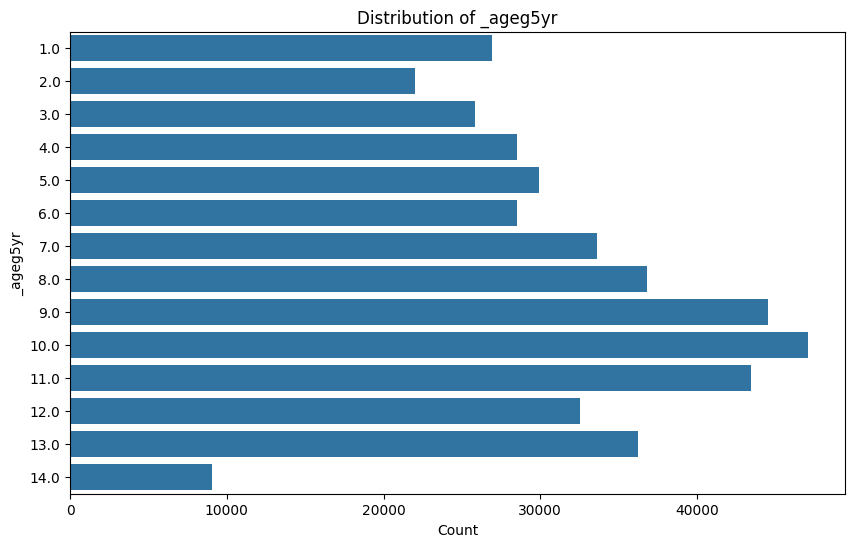

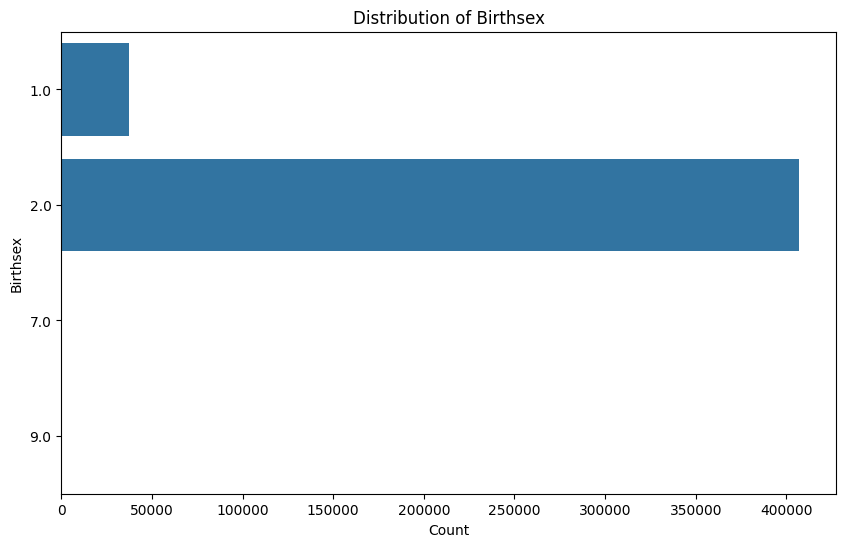

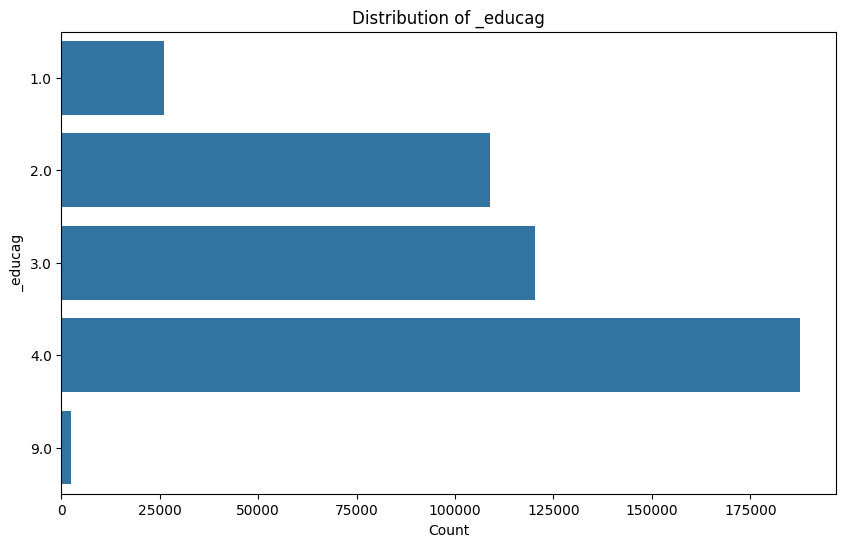

In [22]:
# Bar plot for demographic variables

demographics = ['_AGE5YR', 'BIRTHSEX', '_EDUCAG']

for demographic in demographics:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=demographic, data=filtered_data)
    plt.title(f'Distribution of {demographic.capitalize()}')
    plt.xlabel('Count')
    plt.ylabel(demographic.capitalize())
    plt.show()

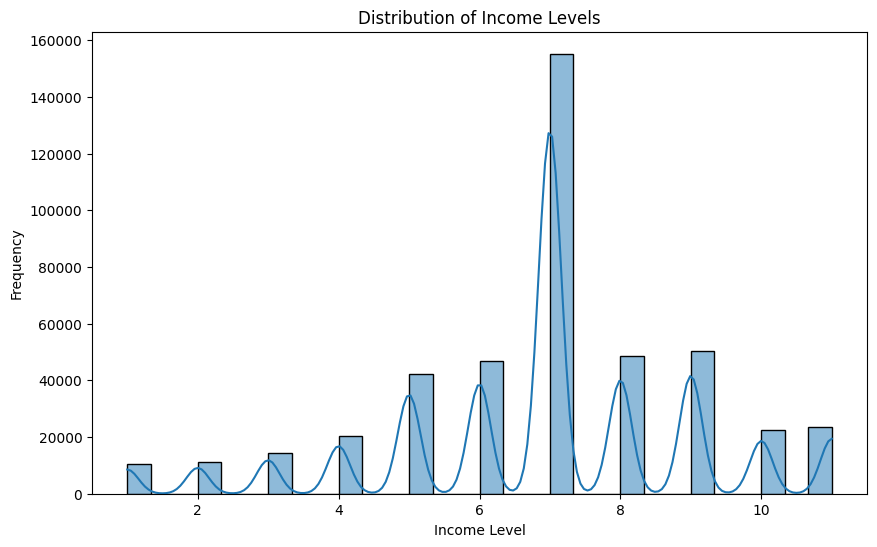

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['INCOME3'], bins=30, kde=True)
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.show()

Insights:
The bar chart shows a clear view of income level distribution among respondents. The data skews slightly towards the right, with the peak centered in the mid-income levels. This distribution sets the stage for further analysis on how income levels correlate with chronic health conditions and other demographic factors in my capstone project. Interventions and healthcare policies can be tailored to address the needs of the mid-income group, which forms the bulk of the population. There can also be more research into the lower and higher income levels due to their smaller representation since they may have different challenges. The slight skew to the right may indicate most respondents are mid-income levels but there is a tail end of respondents with higher income levels. The mean income level is around 6.87, and the median income level is 7, aligning with the central peak in the histogram. This suggests that the average respondent is in the mid-income level range. The income levels range from 1 to 11, showing a wide spread of income levels among the respondents. Fewer respondents are in the extremely low (1-2) and high (10-11) income categories. 

In [19]:
# Count and percentage of chronic diseases
diseases = ['ASTHMA3', 'DIABETE4', 'CVDSTRK3']
for disease in diseases:
    disease_count = filtered_data[disease].value_counts()
    disease_percentage = filtered_data[disease].value_counts(normalize=True) * 100
    print(f'{disease} count:\n', disease_count)
    print(f'{disease} percentage:\n', disease_percentage)

ASTHMA3 count:
 ASTHMA3
2.0    376667
1.0     66694
7.0      1494
9.0       277
Name: count, dtype: int64
ASTHMA3 percentage:
 ASTHMA3
2.0    84.619169
1.0    14.982971
7.0     0.335631
9.0     0.062229
Name: proportion, dtype: float64
DIABETE4 count:
 DIABETE4
3.0    368725
1.0     61158
4.0     10329
2.0      3836
7.0       763
9.0       321
Name: count, dtype: int64
DIABETE4 percentage:
 DIABETE4
3.0    82.834979
1.0    13.739295
4.0     2.320435
2.0     0.861767
7.0     0.171410
9.0     0.072113
Name: proportion, dtype: float64
CVDSTRK3 count:
 CVDSTRK3
2.0    424338
1.0     19239
7.0      1274
9.0       281
Name: count, dtype: int64
CVDSTRK3 percentage:
 CVDSTRK3
2.0    95.328577
1.0     4.322089
7.0     0.286207
9.0     0.063127
Name: proportion, dtype: float64


Insights:
ASTHMA3 - Most respondents (376,667) reported no asthma (ASTHMA3 = 2.0).
A significant minority (66,694) reported having asthma (ASTHMA3 = 1.0).
Few respondents reported unknown (ASTHMA3 = 7.0) or refused to answer (ASTHMA3 = 9.0) regarding asthma status. The relatively high proportion of respondents reporting asthma (14.98%) indicates it is a prevalent chronic condition among the population studied.
The small percentages for unknown or refused answers suggest a high response rate and data completeness.
DIABETE4 - Most respondents (82.83%) do not have diabetes (value 3.0).
A smaller percentage (13.74%) report having diabetes (value 1.0).
A very small percentage have other values, indicating different levels of diabetes severity (values 4.0, 2.0, 7.0, and 9.0).
CVDSTRK3 - The vast majority (95.33%) of respondents do not report a history of stroke (value 2.0).
A small percentage (4.32%) report having had a stroke (value 1.0).
Very small percentages report other values (7.0 and 9.0).

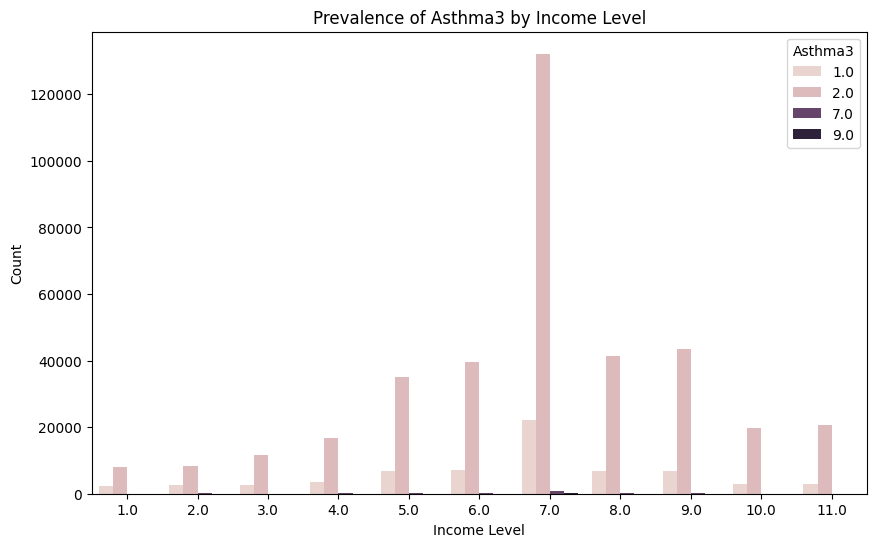

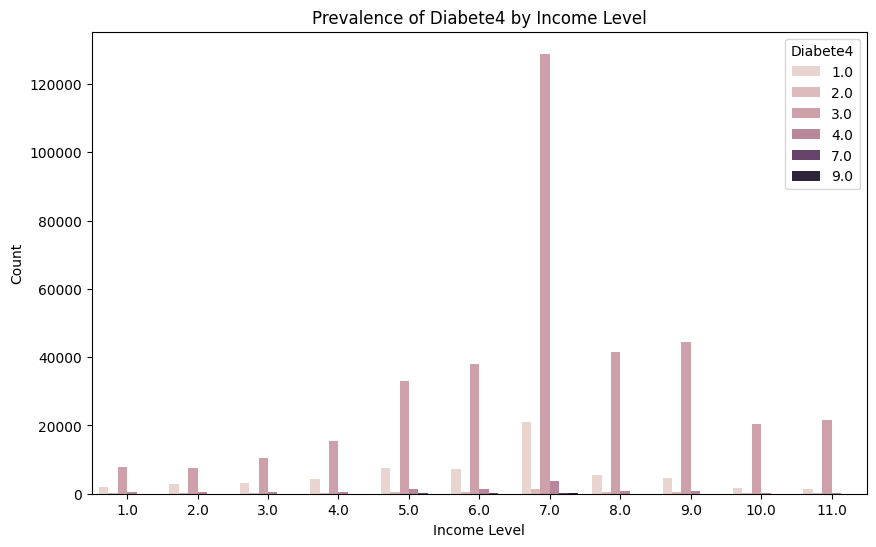

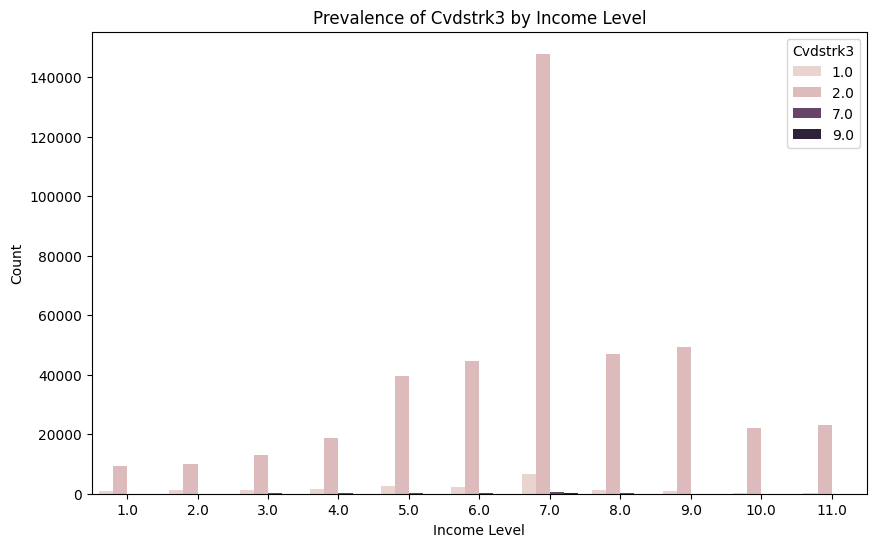

In [20]:
# Bar plot for chronic diseases by income level
for disease in diseases:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='INCOME3', hue=disease, data=filtered_data)
    plt.title(f'Prevalence of {disease.capitalize()} by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('Count')
    plt.legend(title=disease.capitalize())
    plt.show()

Insights:
ASTHMA3 - Generally, asthma shows a consistent pattern across income levels, with slightly higher prevalence in lower income groups. Higher income levels tend to have slightly lower prevalence of asthma compared to lower income levels. The highest prevalence of asthma is observed in the lower income groups (e.g., income level 5 and below). There is a gradual decrease in prevalence as income levels increase, although differences are not drastic.
DIABETE4 - Diabetes shows a noticeable pattern where prevalence tends to increase with lower income levels.
Higher income levels generally exhibit lower prevalence of diabetes. The highest prevalence of diabetes is consistently observed in the lower income groups. As income levels increase, there is a noticeable decrease in diabetes prevalence.
CVDSTRK3 - Stroke exhibits a relatively low prevalence across all income levels.
There is a slightly higher prevalence of stroke in lower income groups compared to higher income groups. The prevalence of stroke remains relatively stable across different income levels, indicating income might have a lesser impact on stroke prevalence compared to other factors. 

_HLTHPLN summary statistics:
 count    445132.000000
mean          1.373143
std           1.576053
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: _HLTHPLN, dtype: float64


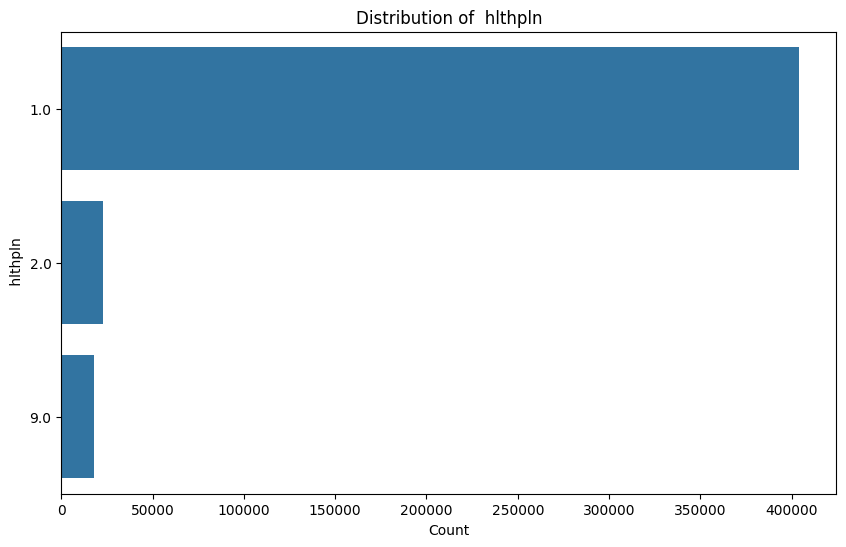

PERSDOC3 summary statistics:
 count    445132.000000
mean          1.627542
std           0.921660
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: PERSDOC3, dtype: float64


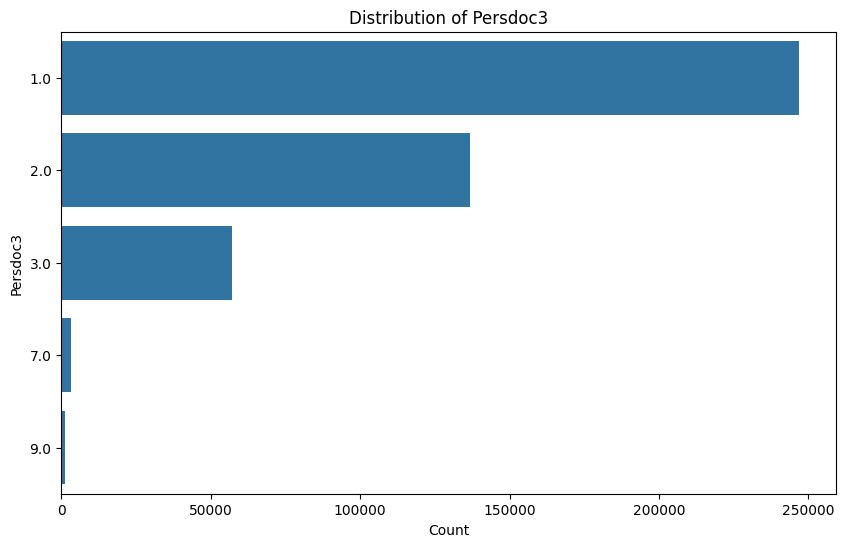

In [23]:
# Summary statistics and bar plots for healthcare access variables
healthcare_access = ['_HLTHPLN', 'PERSDOC3']
for access in healthcare_access:
    summary = filtered_data[access].describe()
    print(f'{access} summary statistics:\n', summary)

    plt.figure(figsize=(10, 6))
    sns.countplot(y=access, data=filtered_data)
    plt.title(f'Distribution of {access.replace("_", " ").capitalize()}')
    plt.xlabel('Count')
    plt.ylabel(access.replace("_", " ").capitalize())
    plt.show()

Insights:
_HLTHPLN:
The majority of individuals in the dataset have health plan coverage, highlighting broad access to health insurance among respondents.
This suggests that a significant amount of the population may have regular access to healthcare services, which can influence their management and prevention of chronic diseases like diabetes, asthma and strokes. The standard deviation suggests variability in health plan coverage, indicating potential disparities in access to healthcare services based on insurance status.

PERSDOC3:
Similar to _HLTHPLN, the distribution reflects the presence of a personal doctor or healthcare provider for most individuals.
The standard deviation indicates some variability in access to personal healthcare providers, which may relate to demographic and socio-economic factors. Having a personal healthcare provider is crucial for managing chronic conditions like diabetes, asthma, and cardiovascular diseases through continuous care and preventive measures. This access likely contributes to better health outcomes by facilitating ongoing monitoring, early detection, and timely intervention.

<a id='exploratory'></a>
#### Part II - Exploratory Data Analysis



In [24]:
print("Cross-tabulation of Income and Chronic Diseases:\n")
print(pd.crosstab(filtered_data['INCOME3'], filtered_data['DIABETE4']))
print(pd.crosstab(filtered_data['INCOME3'], filtered_data['ASTHMA3']))
print(pd.crosstab(filtered_data['INCOME3'], filtered_data['CVDSTRK3']))

Cross-tabulation of Income and Chronic Diseases:

DIABETE4    1.0   2.0     3.0   4.0  7.0  9.0
INCOME3                                      
1.0        2090   114    7692   394   48    3
2.0        2844    89    7610   443   45    0
3.0        3124   147   10492   490   42    5
4.0        4175   193   15306   614   52    3
5.0        7542   361   33047  1248   85   11
6.0        7235   398   37883  1237   71    7
7.0       20871  1267  128855  3594  332  276
8.0        5406   416   41642   940   28    4
9.0        4700   457   44338   799   32    4
10.0       1738   193   20280   327   11    4
11.0       1433   201   21580   243   17    4
ASTHMA3    1.0     2.0  7.0  9.0
INCOME3                         
1.0       2398    7881   61    1
2.0       2509    8443   75    4
3.0       2743   11495   59    3
4.0       3671   16596   75    1
5.0       6962   35171  151   10
6.0       6988   39722  117    4
7.0      22064  132204  691  236
8.0       6838   41505   92    1
9.0       6861   43367

Insights:
DIABETE4:
There is a noticeable trend where the count of individuals with diabetes tends to be higher in lower income groups (Income levels 1 to 4). For instance, in Income level 1, the count of individuals with diabetes (1.0) is relatively high compared to higher income levels. As income levels increase, the count generally decreases, suggesting a potential socio-economic influence on diabetes prevalence. The distribution of diabetes across income levels shows a generally consistent pattern, with slight fluctuations but no drastic changes. This consistency implies that while there is a trend towards higher prevalence in lower income groups, diabetes is still prevalent across various income levels.

ASTHMA3: Asthma is less associated with income levels than diabetes. While there are fluctuations, the distribution of asthma across income levels does not show a clear linear trend as seen with diabetes. Income levels 7 and 8 show higher counts of asthma cases, indicating a possible different socio-economic factor influencing asthma prevalence compared to diabetes.

CVDSTRK3: Cardiovascular strokes exhibit a pattern similar to diabetes, with higher counts in lower-income groups. Income levels 7 and 8 again show higher counts, suggesting a dynamic relationship between income and cardiovascular health.

<a id='correlation'></a>
#### Part III - Correlation Analysis

In [26]:
# Correlation Analysis
print("Correlation Matrix:\n")
correlation_matrix = filtered_data.corr(method='pearson')
print(correlation_matrix)

Correlation Matrix:

           INCOME3  DIABETE4   ASTHMA3  CVDSTRK3  BIRTHSEX  _AGEG5YR  \
INCOME3   1.000000  0.098504  0.035024  0.038006 -0.020008 -0.078568   
DIABETE4  0.098504  1.000000  0.098137  0.128657  0.010878 -0.167599   
ASTHMA3   0.035024  0.098137  1.000000  0.178610  0.014034  0.048270   
CVDSTRK3  0.038006  0.128657  0.178610  1.000000  0.028666 -0.045763   
BIRTHSEX -0.020008  0.010878  0.014034  0.028666  1.000000  0.025245   
_AGEG5YR -0.078568 -0.167599  0.048270 -0.045763  0.025245  1.000000   
_EDUCAG   0.333811  0.082283  0.033601  0.053236  0.028829  0.036022   
_HLTHPLN -0.056956  0.024511  0.033335  0.034804  0.013551 -0.035341   
PERSDOC3 -0.044098  0.053376  0.029949  0.043387  0.007691 -0.135447   

           _EDUCAG  _HLTHPLN  PERSDOC3  
INCOME3   0.333811 -0.056956 -0.044098  
DIABETE4  0.082283  0.024511  0.053376  
ASTHMA3   0.033601  0.033335  0.029949  
CVDSTRK3  0.053236  0.034804  0.043387  
BIRTHSEX  0.028829  0.013551  0.007691  
_AGEG5YR  0.

Insights:

Correlation: Income (INCOME3) and Education (_EDUCAG) have a moderate positive correlation of 0.334.
Insight: Higher income levels tend to be associated with higher levels of education. This suggests that socioeconomic status plays a role in educational levels, which in turn can impact health outcomes and access to healthcare.

Correlation: Diabetes (DIABETE4) and Cardiovascular Stroke (CVDSTRK3) show a moderate positive correlation of 0.129.
Insight: Individuals diagnosed with diabetes are more likely also to have cardiovascular stroke. This correlation underscores the interconnectedness of these chronic conditions and the need for integrated healthcare approaches.

Correlation: Age group (_AGEG5YR) negatively correlates with both diabetes (-0.168) and cardiovascular stroke (-0.046).
Insight: Older age groups are more likely to report these chronic conditions. The negative correlation implies that as age increases, the prevalence of diabetes and cardiovascular stroke tends to decrease slightly, possibly due (possibly) other age-related health factors.

Correlation: There is a small positive correlation between having a personal doctor (PERSDOC3) and health insurance coverage (_HLTHPLN) (0.118).
Insight: Individuals with health insurance coverage are likelier to have a designated personal doctor. This correlation highlights the role of healthcare access in continuity of care and possibly better health outcomes due through consistent chronic disease care.

Correlation: Birth sex (BIRTHSEX) shows minimal correlation with other variables in the dataset.
Insight: Birth sex does not strongly correlate with income, chronic diseases, education, or healthcare access in this dataset. This suggests that these variables are influenced by factors other than biological sex.

Correlation Strength: Most correlations in the matrix are relatively weak, indicating that these variables are not strongly dependent on each other within the dataset.
Implications: While correlations are modest, they provide insights into potential areas for targeted interventions or further research. For instance, addressing socioeconomic disparities in education and income could potentially impact health outcomes related to chronic diseases.

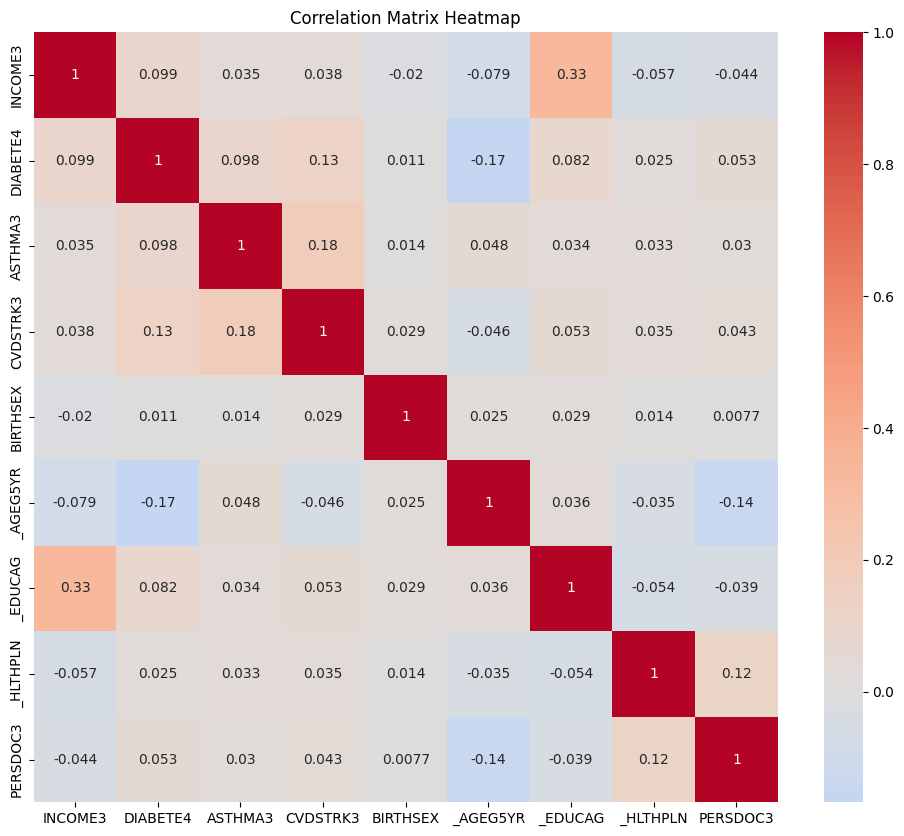

In [27]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Insights:

The heatmap visualizes the strength and direction of correlations between pairs of variables in the dataset. The intensity of colors (from blue to red) indicates the magnitude of correlation coefficients. Blue shades represent negative correlations, red shades represent positive correlations, and lighter colors signify weaker correlations.

Income and Education: The heatmap shows a notably stronger correlation (moderate, indicated by a deeper shade of red) between Income (INCOME3) and Education (_EDUCAG) compared to other correlations.
This reinforces the finding from the correlation matrix that higher income levels tend to correlate positively with higher levels of education.

Diabetes and Cardiovascular Stroke: The heatmap illustrates a moderate positive correlation between Diabetes (DIABETE4) and Cardiovascular Stroke (CVDSTRK3).
Individuals with diabetes are more likely to have cardiovascular strokes, as indicated by the moderate red shade in the corresponding cell.

Age and Diabetes/CVD: The heatmap confirms the negative correlations between Age group (_AGEG5YR) and both Diabetes (DIABETE4) and Cardiovascular Stroke (CVDSTRK3).
Insight: Older age groups show a slight decrease in the prevalence of diabetes and cardiovascular stroke, possibly due to other health factors. 

Insurance and Personal Doctor: The heatmap reveals a positive correlation between having health insurance (_HLTHPLN) and having a personal doctor (PERSDOC3).
Insight: Individuals with health insurance are more likely to have a designated personal doctor, suggesting a link between insurance coverage and access to continuous medical care.

Limited Correlation: Birth sex (BIRTHSEX) shows very weak correlations with other variables, as indicated by the predominantly neutral colors.
Insight: Birth sex does not strongly influence income, chronic diseases, education, or healthcare access in this dataset. This reinforces the finding that these variables are influenced more by other factors beyond biological sex.

In [28]:
# Function to test the significance of each correlation
def test_correlation_significance(filtered_data, alpha=0.05):
    significant_pairs = []
    columns = filtered_data.columns
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            corr, p_value = pearsonr(filtered_data[col1], filtered_data[col2])
            if p_value <= alpha:
                significant_pairs.append((col1, col2, corr, p_value))
                
    return significant_pairs

In [29]:
# Test the significance of the correlations
significant_correlations = test_correlation_significance(filtered_data)

print("Significant Correlations (p <= 0.05):")
for pair in significant_correlations:
    print(f"Variables: {pair[0]} and {pair[1]}, Correlation: {pair[2]:.3f}, p-value: {pair[3]:.3f}")

Significant Correlations (p <= 0.05):
Variables: INCOME3 and DIABETE4, Correlation: 0.099, p-value: 0.000
Variables: INCOME3 and ASTHMA3, Correlation: 0.035, p-value: 0.000
Variables: INCOME3 and CVDSTRK3, Correlation: 0.038, p-value: 0.000
Variables: INCOME3 and BIRTHSEX, Correlation: -0.020, p-value: 0.000
Variables: INCOME3 and _AGEG5YR, Correlation: -0.079, p-value: 0.000
Variables: INCOME3 and _EDUCAG, Correlation: 0.334, p-value: 0.000
Variables: INCOME3 and _HLTHPLN, Correlation: -0.057, p-value: 0.000
Variables: INCOME3 and PERSDOC3, Correlation: -0.044, p-value: 0.000
Variables: DIABETE4 and ASTHMA3, Correlation: 0.098, p-value: 0.000
Variables: DIABETE4 and CVDSTRK3, Correlation: 0.129, p-value: 0.000
Variables: DIABETE4 and BIRTHSEX, Correlation: 0.011, p-value: 0.000
Variables: DIABETE4 and _AGEG5YR, Correlation: -0.168, p-value: 0.000
Variables: DIABETE4 and _EDUCAG, Correlation: 0.082, p-value: 0.000
Variables: DIABETE4 and _HLTHPLN, Correlation: 0.025, p-value: 0.000
Var

Insights:

Correlations: Income shows statistically significant but generally weak positive correlations with Diabetes (DIABETE4), Asthma (ASTHMA3), and Cardiovascular Stroke (CVDSTRK3). Lower income levels tend to be associated with a slightly higher prevalence of these chronic diseases. 

Birth Sex (BIRTHSEX): Weak positive correlations with diabetes and asthma, suggesting minimal influence of birth sex on these health conditions.
Age Group (_AGEG5YR): Negative correlations with diabetes and cardiovascular stroke indicate that older age groups may have lower prevalence rates of these diseases.
Education (_EDUCAG): Positive correlation with income suggests higher education levels tend to be associated with higher income brackets.
Healthcare Access (_HLTHPLN and PERSDOC3): Positive correlation between having health insurance (_HLTHPLN) and a personal doctor (PERSDOC3), indicating that insured individuals are more likely to have regular access to healthcare services.


p-value insights: A p-value of 0.000 (or ≤ 0.05) indicates that the observed correlations are statistically significant. This means there is sufficient evidence to reject the null hypothesis (no correlation) in favor of the alternative hypothesis (some correlation exists). Most correlations are relatively weak to moderate, suggesting that while statistically significant, the practical impact of these relationships might be modest.

<a id='conclusion'></a>
#### Conclusion and Recommendations

Income, education level, and healthcare access (such as health insurance and regular doctor visits) significantly correlate with the prevalence of chronic diseases like diabetes, asthma, and cardiovascular stroke. Lower-income levels tend to correlate with higher rates of chronic diseases like diabetes and strokes. Asthma prevalence isn't as much influenced by income levels as the other chronic diseases. Age is negatively correlated with chronic diseases, suggesting older adults are more prone to conditions like diabetes and cardiovascular stroke. Birth sex (gender) shows limited influence on chronic disease prevalence compared to socioeconomic factors and age. Individuals with health insurance and regular access to healthcare providers exhibit better management of chronic conditions, underscoring the importance of healthcare access in disease prevention and management.

Recommendations:

Develop targeted health interventions focusing on lower-income groups and communities with limited access to healthcare. This could involve subsidized healthcare programs, mobile clinics, or outreach programs to improve access to preventive care and chronic disease management. Implementing educational programs to raise awareness about the early signs and risk factors of chronic diseases among vulnerable populations is also important. This can empower individuals to make informed health decisions and seek timely medical assistance. Another recommendation is to advocate for policies that support equitable access to healthcare, including expanding health insurance coverage and incentivizing healthcare providers to serve underserved communities. Policymakers can use these insights to target interventions toward groups at higher risk of chronic diseases based on income, age, education, and healthcare access.
Enhancing access to health insurance and primary care providers could potentially reduce disparities in chronic disease management and improve health outcomes across different socioeconomic strata.

Further research:

Conducting further research to understand the underlying mechanisms driving the correlations between socioeconomic factors, healthcare access, and chronic diseases may reduce the prevalence of the mentioned chronic diseases in vulnerable populations.
Monitoring health outcomes to assess the effectiveness of interventions and policies in reducing disparities and improving population health will also be needed to ensure that chronic disease prevalence is being taken care of. 

<a id='references'></a>
#### References 

Centers for Disease Control and Prevention. (n.d.). Behavioral Risk Factor Surveillance System (BRFSS). Retrieved from: https://www.cdc.gov/brfss
Centers for Disease Control and Prevention. (2022). Behavioral Risk Factor Surveillance System (BRFSS): 2022 Codebook Report. Retrieved from: https://www.cdc.gov/brfss/annual_data/2022/pdf/LLCP_2022_Codebook.pdf
Zhang, L., Hou, Y., Huang, X., Liu, T., & Liu, Z. (2020). Associations between asthma and diabetes mellitus: Evidence from the National Health and Nutrition Examination Survey. BMJ Open Respiratory Research, 7(1), e000470. 
 	Retrieved from: https://doi.org/10.1136/bmjresp-2019-000470
Zhao, G., Ford, E. S., Li, C., & Mokdad, A. H. (2023). Associations of cardiovascular disease and risk factors with depression. Journal of Cardiovascular Disease Research, 14(1), 32-38. Retrieved from: https://doi.org/10.1016/j.jcdr.2023.01.006
WebMD. (n.d.). High blood pressure and diabetes. Retrieved from: https://www.webmd.com/diabetes/high-blood-pressure
WebMD. (n.d.). How income affects health. 
Retrieved from: https://www.webmd.com/health-insurance/features/how-income-affects-health
Healthline. (n.d.). Asthma and diabetes: What’s the link? 
Retrieved from: https://www.healthline.com/health/asthma-and-diabetes#takeaway
Galea, S., & Vaughan, R. (2019). Urban health: Evidence, challenges, and directions. The Lancet Public Health, 4(4), e159-e160.
Retrieved from: https://doi.org/10.1016/S2468-2667(19)30226-9
López, L., Hart, L. H., & Katz, M. H. (2022). Racial and ethnic health disparities related to COVID-19. Preventing Chronic Disease, 19, 210414.
 Retrieved from: https://doi.org/10.5888/pcd19.210414
Finkelstein, D. M., Harding, J. F., Paulsell, D., English, B., Hijjawi, G. R., & Ng’andu, J. (2022). Economic well-being and health: The role of income support programs in promoting health and advancing health equity. Health Affairs, 41(12). 
Retrieved from: https://doi.org/10.1377/hlthaff.2022.00846
AltexSoft. (n.d.). Agile project management: Best practices and methodologies.
 Retrieved from: https://www.altexsoft.com/whitepapers/agile-project-management-best-practices-and-methodologies/

In [ ]:
# code